# Statistics of DDG

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pylab as plt
import sklearn.metrics
import scipy.stats
import copy

sns.set_style("white")

In [2]:
def compute_statistic(y_true_sample, y_pred_sample):
    """Compute requested statistic.

    Parameters
    ----------
    y_true : ndarray with shape (N,)
        True values
    y_pred : ndarray with shape (N,)
        Predicted values
    statistic : str
        Statistic, one of ['RMSE', 'MUE', 'R2', 'rho']

    """
    RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_true_sample, y_pred_sample))
    MUE = sklearn.metrics.mean_absolute_error(y_true_sample, y_pred_sample)
    _, _, r_value, _, _ = scipy.stats.linregress(y_true_sample, y_pred_sample)
    rho = scipy.stats.pearsonr(y_true_sample, y_pred_sample)[0]
    tau = scipy.stats.kendalltau(y_true_sample, y_pred_sample)[0]
    return RMSE, MUE, r_value, rho, tau

In [3]:
def plotting(x,y):
    
    xmin = min(x)
    xmax = max(x)

    plt.plot([-xmax, xmax], [-xmax, xmax], 'b-')
    plt.plot([0, 0], [-xmax, xmax], 'k:')
    plt.plot([-xmax, xmax], [0, 0], 'k:')
#     plt.plot([-xmin, -xmax], [xmin, xmax], 'k:')    
    
    plt.scatter(x,y)
    title = []
    RMSE, MUE, r_value, rho, tau = compute_statistic(x,y)
    plt.title(f'RMSE:{RMSE:.2}\n MUE:{MUE:.2}\n R:{r_value:.2}\n rho:{rho:.2}\n tau:{tau:.2}\n')
    plt.show()
    
    return RMSE, MUE, r_value, rho, tau

### Plotting starting point

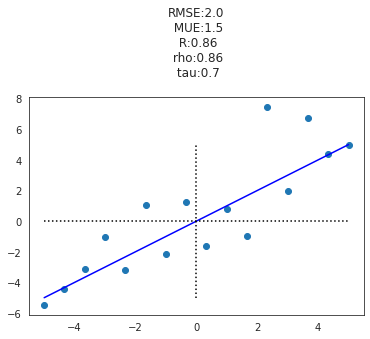

In [4]:
X = list(np.linspace(-5,5,16))
Y = [np.random.normal(i,2) for i in X]

RMSE_start, MUE_start, R_start, rho_start, tau_start = plotting(X,Y)

### Plotting i -> j


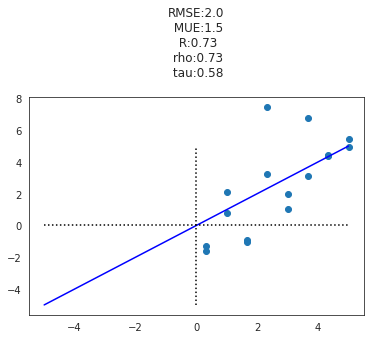

In [5]:
pos_X = []
pos_Y = []
for x,y in zip(X,Y):
    if x < 0:
        pos_X.append(-x)
        pos_Y.append(-y)
    else:
        pos_X.append(x)
        pos_Y.append(y)        

RMSE_pos, MUE_pos, R_pos, rho_pos, tau_pos = plotting(pos_X,pos_Y)

### Plotting j -> i and i -> j

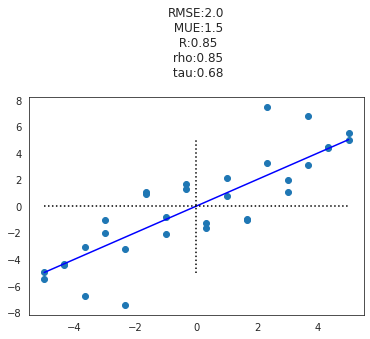

In [6]:
Xall = X + [-x for x in X]
Yall = Y + [-y for y in Y]

RMSE_all, MUE_all, R_all, rho_all, tau_all = plotting(Xall,Yall)

### Analysing all combinations of distributions

In [7]:
historyRMSE = []
historyMUE = []
historyR = []
historyrho = []
historytau = []


for combinations in itertools.product([0, 1], repeat=len(X)):
    x = copy.copy(X)
    y = copy.copy(Y)
    for i,com in enumerate(combinations):
        if bool(com):
            x[i] = -x[i]
            y[i] = -y[i]    
            
#     plotting(x,y)

    RMSE, MUE, R, rho, tau = compute_statistic(x,y)
    historyRMSE.append(RMSE)
    historyMUE.append(MUE)
    historyR.append(R)
    historyrho.append(rho)
    historytau.append(tau)

/home/richard/miniconda3/envs/openfe/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/richard/miniconda3/envs/openfe/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


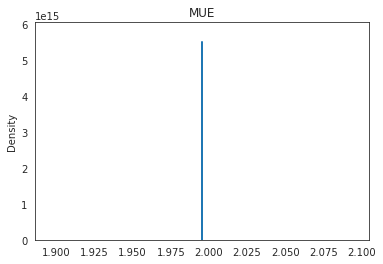

/home/richard/miniconda3/envs/openfe/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/richard/miniconda3/envs/openfe/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


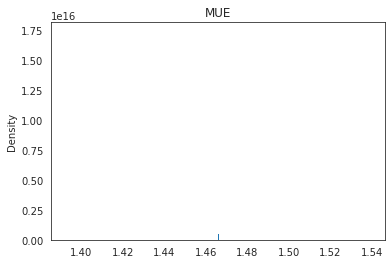

/home/richard/miniconda3/envs/openfe/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/richard/miniconda3/envs/openfe/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


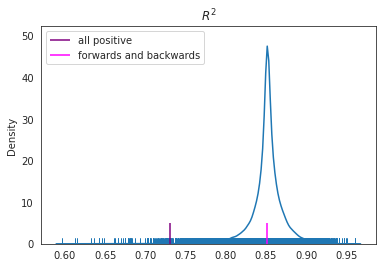

/home/richard/miniconda3/envs/openfe/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/richard/miniconda3/envs/openfe/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


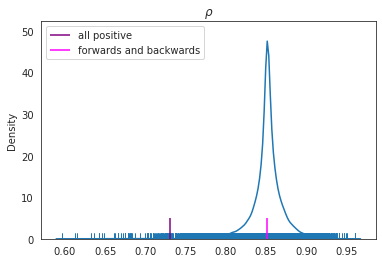

/home/richard/miniconda3/envs/openfe/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/richard/miniconda3/envs/openfe/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


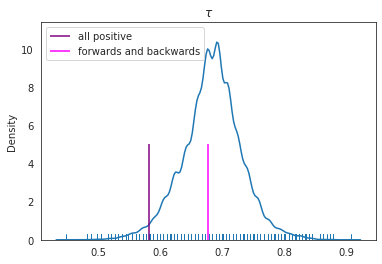

In [8]:
sns.distplot(historyRMSE,hist=False,rug=True)
plt.title('MUE')
plt.show()

sns.distplot(historyMUE,hist=False,rug=True)
plt.title('MUE')
plt.show()

sns.distplot(historyR,hist=False,rug=True)
# plt.vlines(np.max(historyR),0,10,color='grey',label='best')
# plt.vlines(np.min(historyR),0,10,color='grey',label='worst')
plt.vlines(R_pos,0,5,color='purple',label='all positive')
plt.vlines(R_all,0,5,color='magenta',label='forwards and backwards')
plt.title(r'$R^2$')
plt.legend()
plt.show()

sns.distplot(historyrho,hist=False,rug=True)
# plt.vlines(np.max(historyrho),0,5,color='grey',label='best')
# plt.vlines(np.min(historyrho),0,5,color='grey',label='worst')
plt.vlines(rho_pos,0,5,color='purple',label='all positive')
plt.vlines(rho_all,0,5,color='magenta',label='forwards and backwards')
plt.legend()
plt.title(r'$\rho$')
plt.show()

sns.distplot(historytau,hist=False,rug=True)
# plt.vlines(np.max(historyrho),0,5,color='grey',label='best')
# plt.vlines(np.min(historyrho),0,5,color='grey',label='worst')
plt.vlines(tau_pos,0,5,color='purple',label='all positive')
plt.vlines(tau_all,0,5,color='magenta',label='forwards and backwards')
plt.legend()
plt.title(r'$\tau$')
plt.show()